In [1503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras import regularizers

In [1504]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv')

In [1505]:
train.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [1506]:
test.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
1,Donkey Kong Country,SNES,1994.0,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30
2,Halo 2,XB,2004.0,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49
3,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.50,2.64,0.00,0.67,6.81
4,LEGO Star Wars: The Complete Saga,Wii,2007.0,Action,LucasArts,3.66,1.63,0.00,0.53,5.83


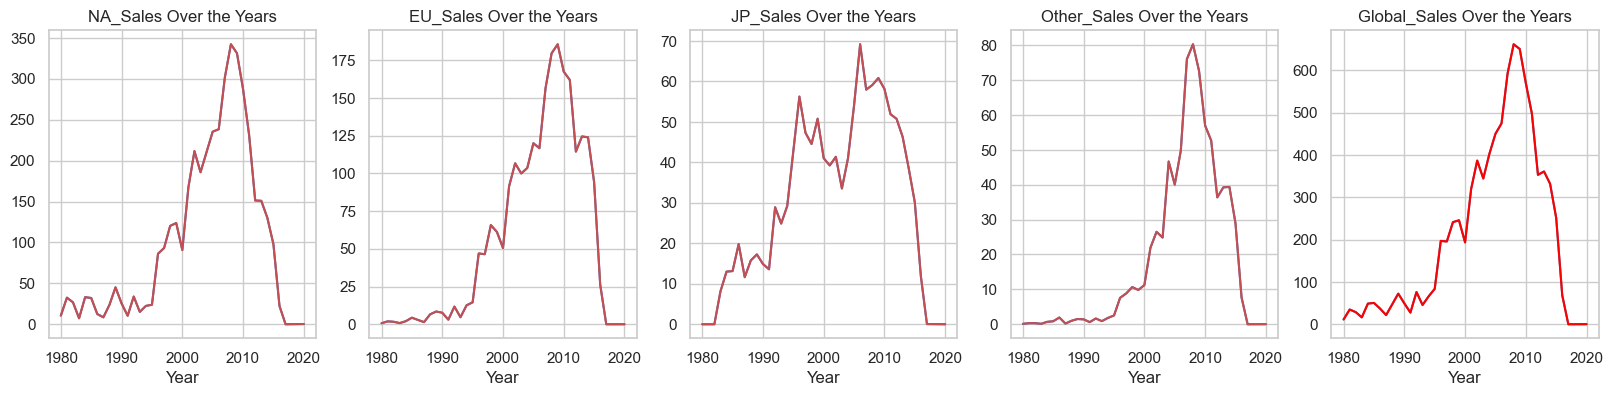

In [1507]:
filtered = train.dropna(subset=['Year'])
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
rows = 1
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 4))

for i, col in enumerate(sales_columns):
    yearly_sales = filtered.groupby('Year')[col].sum()
    sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, ax=axes[i])
    axes[i].set_title(f'{col} Over the Years')
    
    color = 'red' if col == 'Global_Sales' else None
    sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, ax=axes[i], color=color)

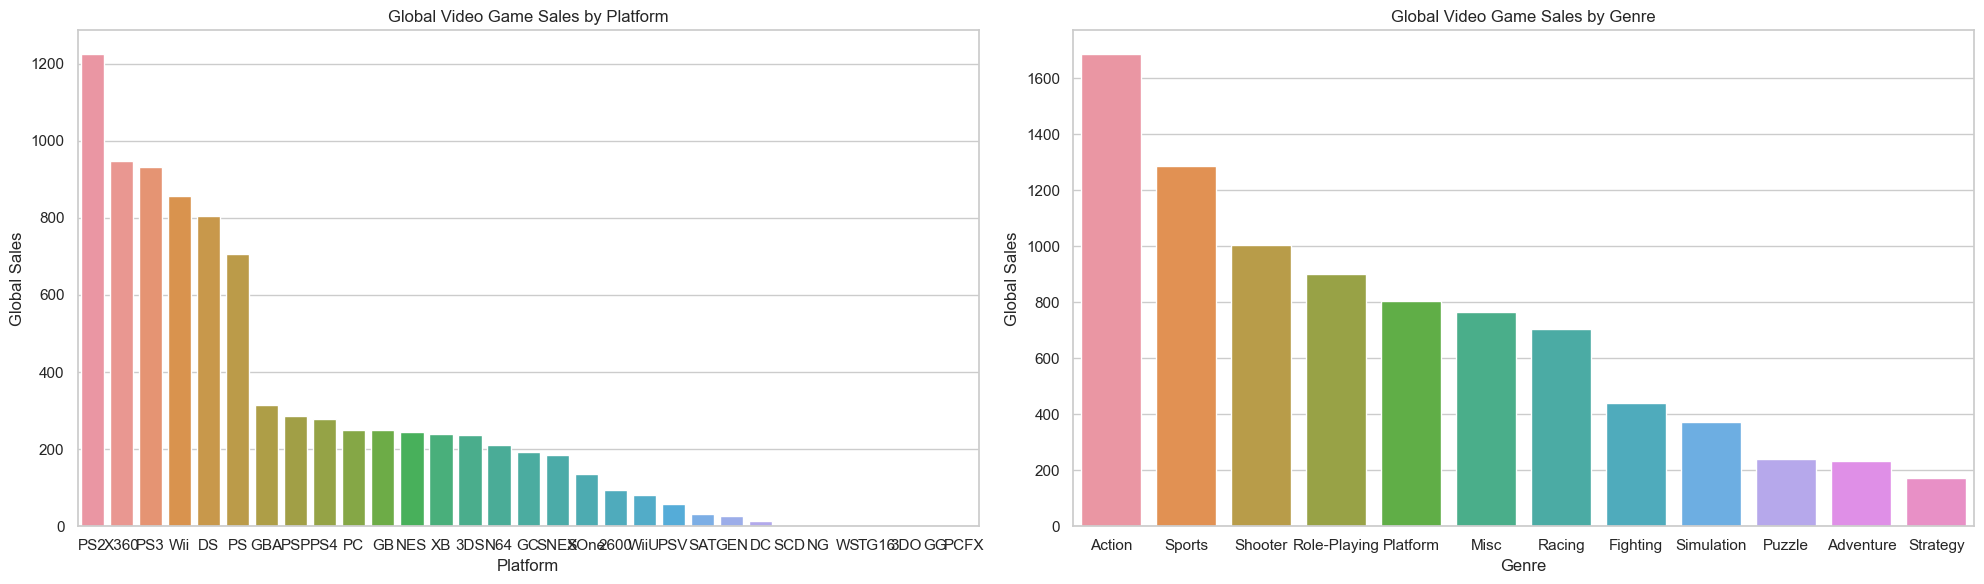

In [1508]:
# Grouping the data by platform and summing up the global sales
platform_sales = train.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Grouping the data by genre and summing up the global sales
genre_sales = train.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Creating subplots for platforms and genres
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plotting the sales by platform
sns.barplot(x=platform_sales.index, y=platform_sales.values, ax=ax[0])
ax[0].set_title('Global Video Game Sales by Platform')
ax[0].set_xlabel('Platform')
ax[0].set_ylabel('Global Sales')

# Plotting the sales by genre
sns.barplot(x=genre_sales.index, y=genre_sales.values, ax=ax[1])
ax[1].set_title('Global Video Game Sales by Genre')
ax[1].set_xlabel('Genre')
ax[1].set_ylabel('Global Sales')

plt.tight_layout()
plt.show()

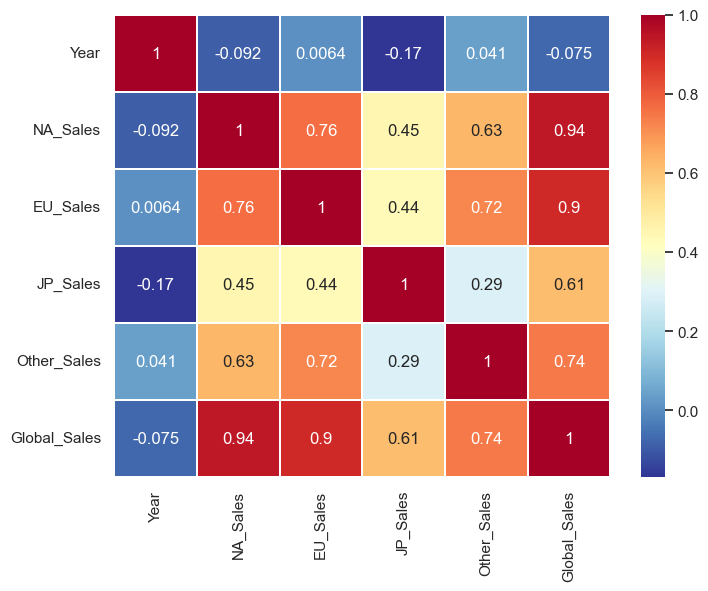

In [1509]:
corr_ = train.drop('Rank', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')
plt.show()

# Preprocessing

## Missing Data

In [1510]:
# replace with NaN
colume = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
train[colume] = train[colume].replace(0,np.nan)

train = train.dropna(thresh=train.shape[1]-1)
#刪除超過2個NaN的資料

In [1511]:
columns_to_drop = ['Name', 'Platform', 'Year', 'Genre', 'Publisher']
# 使用 drop 函數刪除指定特徵列
train = train.drop(columns=columns_to_drop)

In [1512]:
from sklearn.impute import SimpleImputer
# fix the remaining missing data
imr = SimpleImputer()
column = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
train[column] = imr.fit_transform(train[colume_2])

train

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,41.49,29.02,3.770000,8.460000,82.74
1,2,29.08,3.58,6.810000,0.770000,40.24
2,3,15.85,12.88,3.790000,3.310000,35.82
3,4,15.75,11.01,3.280000,2.960000,33.00
4,5,11.27,8.89,10.220000,1.000000,31.37
...,...,...,...,...,...,...
13674,14185,0.02,0.01,0.291363,0.010000,0.03
13676,14187,0.01,0.02,0.291363,0.010000,0.03
13757,14270,0.01,0.02,0.291363,0.010000,0.03
13786,14302,0.01,0.02,0.291363,0.010000,0.03


In [1513]:
colume = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
test[colume] = test[colume].replace(0,np.nan)

columns_to_drop = ['Platform', 'Year', 'Genre', 'Publisher']
test = test.drop(columns=columns_to_drop)

imr = SimpleImputer()
column = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
test[column] = imr.fit_transform(test[colume_2])

test

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Play,14.030000,9.200000,2.930000,2.85000,29.02
1,Donkey Kong Country,4.360000,1.710000,3.000000,0.23000,9.30
2,Halo 2,6.820000,1.530000,0.050000,0.08000,8.49
3,Zumba Fitness,3.500000,2.640000,0.217169,0.67000,6.81
4,LEGO Star Wars: The Complete Saga,3.660000,1.630000,0.217169,0.53000,5.83
...,...,...,...,...,...,...
595,Space Raiders,0.010000,0.208542,0.217169,0.07059,0.01
596,Smart Boy's Winter Wonderland,0.010000,0.208542,0.217169,0.07059,0.01
597,Dramatical Murder Re:code,0.364671,0.208542,0.010000,0.07059,0.01
598,Hanasaku Manimani,0.364671,0.208542,0.010000,0.07059,0.01


## Normalize

In [1514]:
from sklearn.preprocessing import MinMaxScaler

train_rank = train['Rank']
test_name = test['Name']

min_max_scaler = MinMaxScaler()

train_sales_scaled = min_max_scaler.fit_transform(train[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
train[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = train_sales_scaled
train['Rank'] = train_rank

test_sales_scaled = min_max_scaler.fit_transform(test[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
test[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = test_sales_scaled
test['Name'] = test_name

In [1515]:
train

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,1.000000,1.000000,0.368266,0.800189,1.000000
1,2,0.700820,0.123061,0.666014,0.071970,0.486156
2,3,0.381871,0.443640,0.370225,0.312500,0.432717
3,4,0.379460,0.379180,0.320274,0.279356,0.398622
4,5,0.271456,0.306101,1.000000,0.093750,0.378914
...,...,...,...,...,...,...
13674,14185,0.000241,0.000000,0.027558,0.000000,0.000000
13676,14187,0.000000,0.000345,0.027558,0.000000,0.000000
13757,14270,0.000000,0.000345,0.027558,0.000000,0.000000
13786,14302,0.000000,0.000345,0.027558,0.000000,0.000000


In [1516]:
test

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Play,1.000000,1.000000,0.976589,1.000000,1.000000
1,Donkey Kong Country,0.310271,0.184984,1.000000,0.077465,0.320234
2,Halo 2,0.485735,0.165397,0.013378,0.024648,0.292313
3,Zumba Fitness,0.248930,0.286181,0.069287,0.232394,0.234402
4,LEGO Star Wars: The Complete Saga,0.260342,0.176279,0.069287,0.183099,0.200620
...,...,...,...,...,...,...
595,Space Raiders,0.000000,0.021604,0.069287,0.021334,0.000000
596,Smart Boy's Winter Wonderland,0.000000,0.021604,0.069287,0.021334,0.000000
597,Dramatical Murder Re:code,0.025298,0.021604,0.000000,0.021334,0.000000
598,Hanasaku Manimani,0.025298,0.021604,0.000000,0.021334,0.000000


# Regression

In [1517]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [1518]:
target_column = 'Rank'
x_reg = train[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y_reg = train[target_column]

# Split the data into training and testing sets
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.076, random_state=45)

regressors = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=2),
    DecisionTreeRegressor(max_depth=4, min_samples_split=3),
    MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=100),
    RandomForestRegressor(max_depth=5, min_samples_split=3),
]

log_reg = []

for reg in regressors:
    reg.fit(x_reg_train, y_reg_train)
    name_reg = reg.__class__.__name__
    print('*' * 30)
    print(name_reg)
    predictions_reg = reg.predict(x_reg_test)
    r2 = r2_score(y_reg_test, predictions_reg)
    print('R-squared: {:.4f}'.format(r2))
    log_reg.append([name_reg, r2])

print('*' * 30)

******************************
LinearRegression
R-squared: 0.1746
******************************
KNeighborsRegressor
R-squared: 0.9915
******************************
DecisionTreeRegressor
R-squared: 0.9047


C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


******************************
MLPRegressor
R-squared: 0.0651
******************************
RandomForestRegressor
R-squared: 0.9479
******************************


# Classification

In [1519]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# By NA_Sales,EU_Sales

In [1520]:
x_cla = train[['NA_Sales', 'EU_Sales']]
y_cla = train['Rank']

k_bins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_discretized = k_bins.fit_transform(y_cla.values.reshape(-1, 1)).astype(int)

x_cla_train, x_cla_test, y_cla_train, y_cla_test = train_test_split(x_cla, y_discretized, test_size=0.076, random_state=45)

classifiers = [
    KNeighborsClassifier(4),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=8, min_samples_split=3),
    MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=100),
    RandomForestClassifier(max_depth=8, min_samples_split=3),
]

log = []
for clf in classifiers:
    clf.fit(x_cla_train, y_cla_train)
    name = clf.__class__.__name__
    print('*' * 30)
    print(name)
    predictions = clf.predict(x_cla_test)
    acc = accuracy_score(y_cla_test, predictions)
    print('Accuracy: {:.4%}'.format(acc))
    log.append([name, acc * 100])

print('*' * 30)

******************************
KNeighborsClassifier
Accuracy: 82.5000%
******************************
GaussianNB
Accuracy: 75.3333%
******************************
DecisionTreeClassifier
Accuracy: 86.6667%


C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\venchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

******************************
MLPClassifier
Accuracy: 84.6667%
******************************
RandomForestClassifier
Accuracy: 87.5000%
******************************


# Classfier: RandomForestClassifier

In [1521]:
x_rt1_train, x_rt1_test, y_rt1_train, y_rt1_test = train_test_split(x,y,test_size=0.076,random_state=45)
x_rt1_test = test.drop(['Name','JP_Sales','Other_Sales','Global_Sales'],axis=1)
x_rt1_test.head()

,NA_Sales,EU_Sales
0,1.000000,1.000000
1,0.310271,0.184984
2,0.485735,0.165397
3,0.248930,0.286181
4,0.260342,0.176279


In [1522]:
from sklearn.ensemble import RandomForestClassifier

RT1 = RandomForestClassifier(max_depth=8,min_samples_split=3)
RT1.fit(x_rt1_train,y_rt1_train)

raw_rt1_predictions = RT1.predict(x_rt1_test)
rt1_predictions = np.round(raw_rt1_predictions).astype(int)

In [1523]:
rt1_predictions

array([    1,    24,    16,     5,    24,    13,    25,    17,    47,
          38,    19,    21,    49,    97,    62,    55,    78,    70,
          42,   102,    90,    59,   107,   240,   453,  1044,   179,
        1044,   469,   164,   190,   545,   128,   194,   177,   214,
         533,   177,   218,  2455,   208,   350,   363,   258,   505,
         258,   237,   329,   225,   263,   241,   815,  1044,   340,
         192,   233,   495,   235,   827,   263,  2174,   340,  1044,
        1044,  1044,   495,   410,   741,   386,   517,   291,   214,
         517,   419,   391,   214,   585,   472,   517,   644,   517,
        5777,   607,   507,   571,   751,   550,   351,   383,   815,
         751,  1375,   396,   697,  1044,   751,   345,   448,   741,
         628,   652,  1412,  4180,  1287,  2076,   893,  1300,   628,
        1441,   728,  1805,  1117,  1044,   879,   882,  1170,   591,
         906,   671,  3259,  1007,  1051,  1032,   281,  1044,  1032,
         921,  1044,

In [1524]:
output = pd.DataFrame({'Name':test.Name,'Rank':rt1_predictions})
output.to_csv('test_submission_1.csv', index=False)

# Prediction score

In [1525]:
x_rt1_train, x_rt1_test, y_rt1_train, y_rt1_test = train_test_split(x,y,test_size=0.076,random_state=45)

In [1547]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_rt1_test, raw_rt1_predictions)
rse = np.sqrt(mse) / np.std(y_rt1_test)
print(f'RSE: {rse:.4f}')

r2 = r2_score(y_rt1_test, raw_rt1_predictions)
print(f'R-squared: {r2:.4f}')

RSE: 1.4576
R-squared: -1.1246


# By NA_Sales,EU_Sales,Other_Sales

In [1528]:
x_cla = train[['NA_Sales', 'EU_Sales', 'Other_Sales']]
y_cla = train['Rank']

k_bins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_discretized = k_bins.fit_transform(y_cla.values.reshape(-1, 1)).astype(int)

x_cla_train, x_cla_test, y_cla_train, y_cla_test = train_test_split(x_cla, y_discretized, test_size=0.076, random_state=45)

classifiers = [
    KNeighborsClassifier(4),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=8, min_samples_split=3),
    MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=100),
    RandomForestClassifier(max_depth=8, min_samples_split=3),
]

log = []
for clf in classifiers:
    clf.fit(x_cla_train, y_cla_train)
    name = clf.__class__.__name__
    print('*' * 30)
    print(name)
    predictions = clf.predict(x_cla_test)
    acc = accuracy_score(y_cla_test, predictions)
    print('Accuracy: {:.4%}'.format(acc))
    log.append([name, acc * 100])

print('*' * 30)

******************************
KNeighborsClassifier
Accuracy: 87.8333%
******************************
GaussianNB
Accuracy: 74.8333%
******************************
DecisionTreeClassifier
Accuracy: 86.3333%


C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\venchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

******************************
MLPClassifier
Accuracy: 85.1667%
******************************
RandomForestClassifier
Accuracy: 88.3333%
******************************


# Classfier: RandomForestClassifier

In [1529]:
x_rt2_train, x_rt2_test, y_rt2_train, y_rt2_test = train_test_split(x,y,test_size=0.076,random_state=45)
x_rt2_test = test.drop(['Name','NA_Sales','JP_Sales','Global_Sales'],axis=1)
x_rt2_test.head()

,EU_Sales,Other_Sales
0,1.000000,1.000000
1,0.184984,0.077465
2,0.165397,0.024648
3,0.286181,0.232394
4,0.176279,0.183099


In [1530]:
x_rt3_train, x_rt3_test, y_rt3_train, y_rt3_test = train_test_split(x,y,test_size=0.076,random_state=45)
x_rt3_test = test.drop(['Name','EU_Sales','JP_Sales','Global_Sales'],axis=1)
x_rt3_test.head()

,NA_Sales,Other_Sales
0,1.000000,1.000000
1,0.310271,0.077465
2,0.485735,0.024648
3,0.248930,0.232394
4,0.260342,0.183099


In [1531]:
from sklearn.ensemble import RandomForestClassifier

RT2 = RandomForestClassifier(max_depth=8,min_samples_split=3)
RT2.fit(x_rt2_train,y_rt2_train)
raw_rt2_predictions = RT.predict(x_rt2_test)
rt2_predictions = np.round(raw_rt2_predictions).astype(int)

RT3 = RandomForestClassifier(max_depth=8,min_samples_split=3)
RT3.fit(x_rt3_train,y_rt3_train)
raw_rt3_predictions = RT.predict(x_rt3_test)
rt3_predictions = np.round(raw_rt3_predictions).astype(int)

all_predictions = np.concatenate([rt1_predictions, rt2_predictions, rt3_predictions])

C:\Users\venchi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Other_Sales
Feature names seen at fit time, yet now missing:
- NA_Sales

  warnings.warn(message, FutureWarning)
C:\Users\venchi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Other_Sales
Feature names seen at fit time, yet now missing:
- EU_Sales

  warnings.warn(message, FutureWarning)


In [1532]:
rt2_predictions

array([    1,    44,    90,     9,    25,    13,    15,    13,   136,
          13,    33,    21,    27,   559,    59,    13,    30,    57,
         102,   277,   317,   126,   192,   270,  1854,  2025,    97,
         792,  3026,    77,   107,  1440,   123,   358,   263,   318,
        1009,   263,   274,  6387,  5446,   329,   110,   929,    54,
         929,   114,   274,   158,   436,  1186,   406,   792,   782,
        1046,  1185,   472,   565,  2201,   565,  4446,   937,   792,
         792,   727,   767,   149,   551,   263,  8434,  2412,   551,
         781,  1969,   404,   967,  1952,   503,  2621,   406,  8434,
       11820,  1287,  7115,   755,   498,   467,  1980,   382,   590,
        1579,  1369,   459,   383,   792,  2405,   156,   847,   727,
        1216,  2514,   281,  1392,  1190,  3393,   590,   263,  1436,
        4691,   467,  1298,  3249,   792,   484,  6850,   763,   876,
        1434,  1270,  5446,  2512,   727,   588,  1109,  1457,  1009,
        1370,   792,

In [1533]:
output = pd.DataFrame({'Name':test.Name,'Rank':rt2_predictions})
output.to_csv('test_submission_2.csv', index=False)

In [1534]:
rt3_predictions

array([    1,     6,    10,    12,    24,    13,    15,    13,    63,
          31,    21,    26,    27,   130,    62,    78,   125,    53,
         120,   180,    51,    50,   128,    62,   929,  1958,   263,
         792,   374,    77,    82,   565,   117,   158,    98,   213,
         128,   248,   274,  3536,   180,    77,   268,   374,   505,
         374,   417,   244,   658,   468,   192,   406,   792,   468,
         374,   556,   318,   565,   832,   515,  1341,   372,   792,
         792,   847,   358,   450,   551,   263,    48,   158,   551,
         248,   280,   620,   495,   156,   518,   216,   644,    48,
        6214,   319,    48,   826,    77,   467,   592,  1245,   312,
         342,   924,   677,   281,   792,   620,  1339,   518,   847,
         629,   556,   345,  1392,  2247,  2249,   400,   263,   967,
         929,   799,  1025,   778,   792,  1316,  1370,   833,   916,
         804,  1270,  2874,  1185,   924,  1071,  1185,  1384,  1245,
        1370,   792,

In [1535]:
output = pd.DataFrame({'Name':test.Name,'Rank':rt3_predictions})
output.to_csv('test_submission_3.csv', index=False)

In [1536]:
average_result = np.mean([rt1_predictions, rt2_predictions, rt3_predictions], axis=0)
final_predictions = np.round(average_result).astype(int)

ooutput = pd.DataFrame({'Name':test.Name,'Rank':final_predictions})
output.to_csv('final_predictions.csv', index=False)

# Prediction score

In [1548]:
x_rt_train, x_rt_test, y_rt_train, y_rt_test = train_test_split(x,y,test_size=0.076,random_state=45)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_rt_test, final_predictions)
rse = np.sqrt(mse) / np.std(y_rt_test)
print(f'RSE: {rse:.4f}')

r2 = r2_score(y_rt_test, final_predictions)
print(f'R-squared: {r2:.4f}')

RSE: 1.4097
R-squared: -0.9871
